## 1.选取两只股票并下载数据储存为csv格式

In [121]:
import os 
import tushare as ts
import datetime 
def download_to_csv(code,start = "2012-12-31",end = datetime.datetime.now().strftime("%Y-%m-%d"),index = False):
    #这个函数可以把code内的出现的股票下载到当前工作目录下的csv文件中！
    path = os.getcwd()
    for i in code:
        name =   i + ".csv"
        print(i + " is loading data,please wait!")
        df = ts.get_k_data(i,start = start,end = end,autype = "qfq",index = index)
        df.to_csv( path + "\\" + name)   
    return 

In [122]:
codes = ["600000","600099"]
download_to_csv(codes)

600000 is loading data,please wait!
600099 is loading data,please wait!


In [123]:
download_to_csv(["000001"],index = True)

000001 is loading data,please wait!


## 2.价格和收益率的均值、方差、偏度、峰度和相关系数

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
import scipy.stats as stats
pfyh = pd.read_csv("600000.csv")
szzs = pd.read_csv("000001.csv")
lhgf = pd.read_csv("600099.csv")

pfyh.index = pfyh["date"]
szzs.index = szzs["date"]
lhgf.index = lhgf["date"]

pfyh_c = pfyh["close"]
szzs_c = szzs["close"]
lhgf_c = lhgf["close"]

In [127]:
pfyh["close"]

date
2012-12-31     5.613
2013-01-04     5.669
2013-01-07     5.839
2013-01-08     5.726
2013-01-09     5.737
2013-01-10     5.681
2013-01-11     5.556
2013-01-14     5.856
2013-01-15     5.845
2013-01-16     5.726
2013-01-17     5.675
2013-01-18     5.749
2013-01-21     5.885
2013-01-22     5.930
2013-01-23     5.998
2013-01-24     6.003
2013-01-25     6.032
2013-01-28     6.326
2013-01-29     6.394
2013-01-30     6.360
2013-01-31     6.496
2013-02-01     6.762
2013-02-04     6.829
2013-02-05     6.716
2013-02-06     6.790
2013-02-07     6.467
2013-02-08     6.416
2013-02-18     6.371
2013-02-19     6.281
2013-02-20     6.116
               ...  
2018-01-12    12.910
2018-01-15    13.020
2018-01-16    12.900
2018-01-17    13.100
2018-01-18    13.240
2018-01-19    13.240
2018-01-22    12.770
2018-01-23    12.900
2018-01-24    13.570
2018-01-25    13.650
2018-01-26    13.410
2018-01-29    13.460
2018-01-30    13.110
2018-01-31    13.170
2018-02-01    13.300
2018-02-02    13.140
2018-02-

In [5]:
def descri(a):  #该函数用于计算统计特性
    mean = np.mean(a)
    var = np.var(a)
    skew = stats.skew(a)
    kurt = stats.kurtosis(a)
    des = pd.Series([mean, var, skew, kurt],index = ["mean","variance","skewness","kurtosis"])
    return des

In [6]:
des_closeprice = pd.concat([descri(szzs_c),descri(pfyh_c),descri(lhgf_c)],axis = 1)
des_closeprice.columns = ["上证指数","浦发银行","林海股份"]
des_closeprice

,上证指数,浦发银行,林海股份
mean,2898.064757,9.557313,9.398165
variance,425560.212133,9.406330,12.659252
skewness,0.493713,-0.301696,0.454785
kurtosis,0.213954,-1.663947,-0.502620


In [7]:
pfyhlog = np.log(pfyh_c)
szzslog = np.log(szzs_c)
lhgflog = np.log(lhgf_c)

pfyhrtn = (pfyhlog - pfyhlog.shift(1)).dropna()
szzsrtn = (szzslog - szzslog.shift(1)).dropna()
lhgfrtn = (lhgflog - lhgflog.shift(1)).dropna()

In [8]:
des_logreturn = pd.concat([descri(szzsrtn),descri(pfyhrtn),descri(lhgfrtn)],axis = 1)
des_logreturn.columns = ["上证指数","浦发银行","林海股份"]
des_logreturn

,上证指数,浦发银行,林海股份
mean,0.000297,0.000670,0.000300
variance,0.000220,0.000391,0.000679
skewness,-1.255763,0.158888,-0.484683
kurtosis,7.314645,5.670434,3.280941


In [9]:
df_price = pd.concat([szzs_c,pfyh_c,lhgf_c],axis = 1)
df_price.columns = ["上证指数价格","浦发银行价格","林海股份价格"]
df_price.corr()

,上证指数价格,浦发银行价格,林海股份价格
上证指数价格,1.000000,0.816553,0.792102
浦发银行价格,0.816553,1.000000,0.845226
林海股份价格,0.792102,0.845226,1.000000


In [10]:
df_rtn = pd.concat([szzsrtn,pfyhrtn,lhgfrtn],axis = 1)
df_rtn.columns = ["上证指数收益率","浦发银行收益率","林海股份收益率"]
df_rtn.corr()

,上证指数收益率,浦发银行收益率,林海股份收益率
上证指数收益率,1.000000,0.643482,0.500457
浦发银行收益率,0.643482,1.000000,0.121652
林海股份收益率,0.500457,0.121652,1.000000


## 3. 自相关系数、直方图、QQ-plot

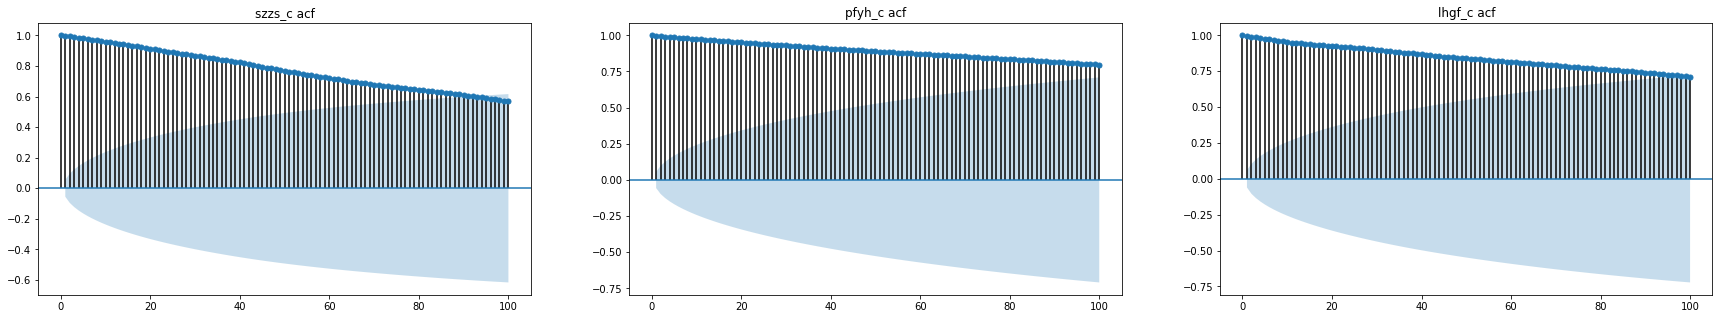

In [11]:
fig = plt.figure(figsize = (30,5))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
sm.graphics.tsa.plot_acf(szzs_c, lags = 100, ax = ax1, title='szzs_c acf', alpha=0.05)
sm.graphics.tsa.plot_acf(pfyh_c, lags = 100, ax = ax2, title='pfyh_c acf', alpha=0.05)
sm.graphics.tsa.plot_acf(lhgf_c, lags = 100, ax = ax3, title='lhgf_c acf', alpha=0.05)

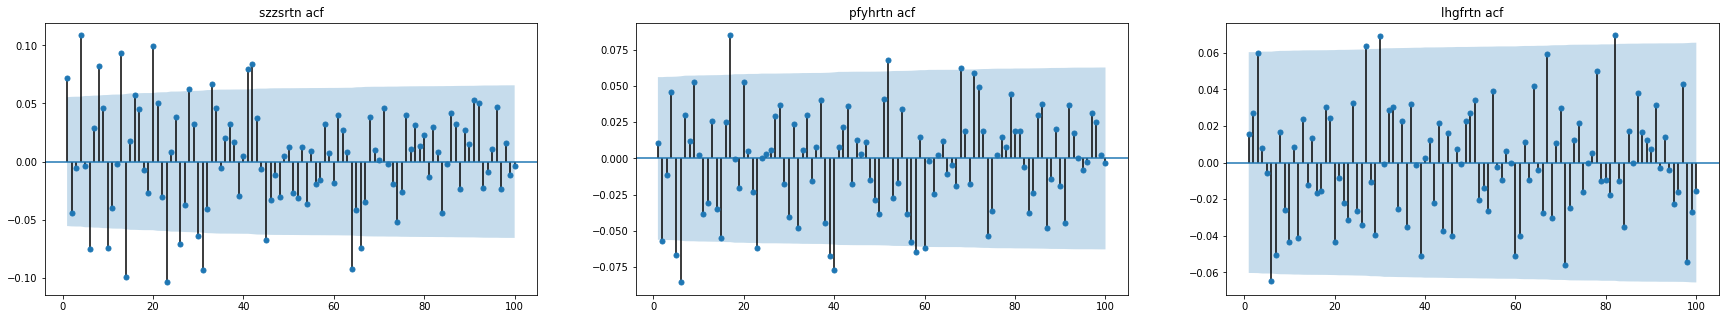

In [12]:
fig = plt.figure(figsize = (30,5))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
sm.graphics.tsa.plot_acf(szzsrtn, lags = 100, ax = ax1, title='szzsrtn acf', alpha=0.05, zero= False)
sm.graphics.tsa.plot_acf(pfyhrtn, lags = 100, ax = ax2, title='pfyhrtn acf', alpha=0.05, zero= False)
sm.graphics.tsa.plot_acf(lhgfrtn, lags = 100, ax = ax3, title='lhgfrtn acf', alpha=0.05, zero= False)

In [13]:
fig, axs = plt.subplots(1,3 , figsize=(15,4))
axs[0].hist(szzs_c, bins = 50)
axs[0].set_title("szzs_c")
axs[1].hist(pfyh_c, bins = 50)
axs[1].set_title("pfyh_c")
axs[2].hist(lhgf_c, bins = 50)
axs[2].set_title("lhgf_c")

Text(0.5,1,'lhgf_c')

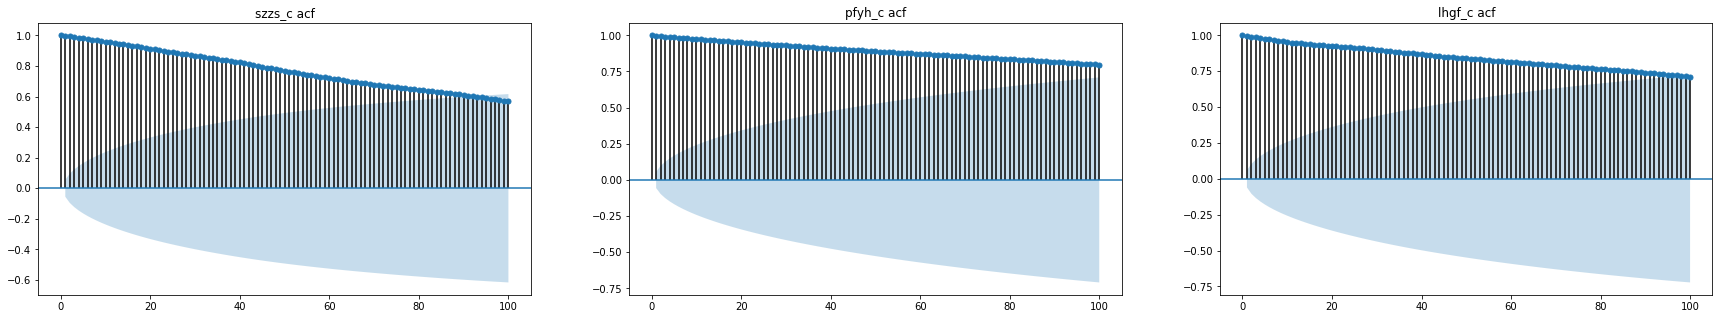

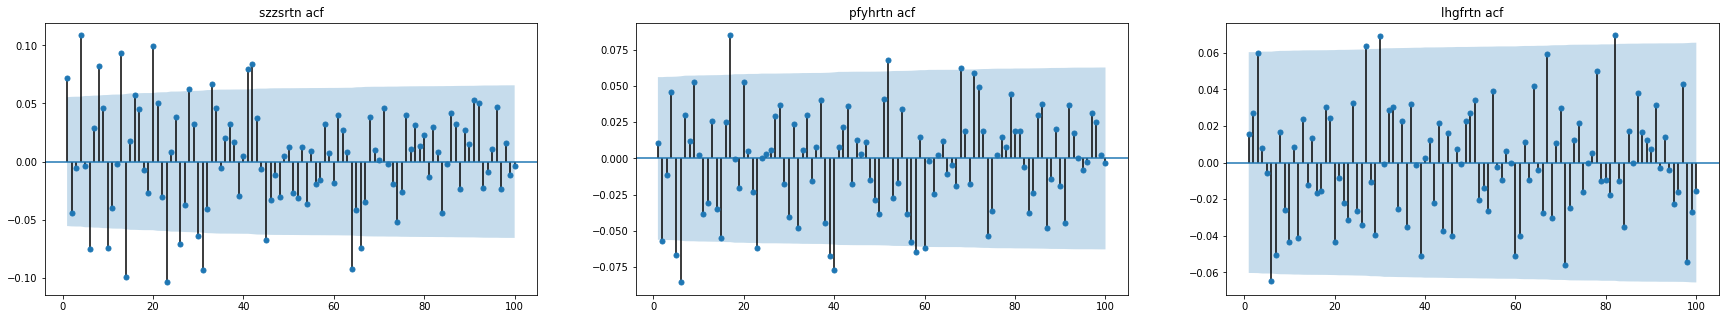

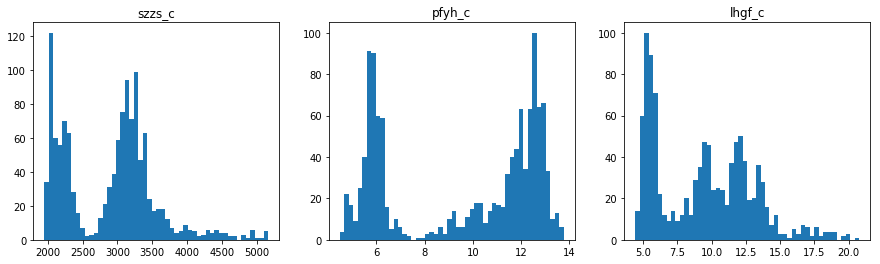

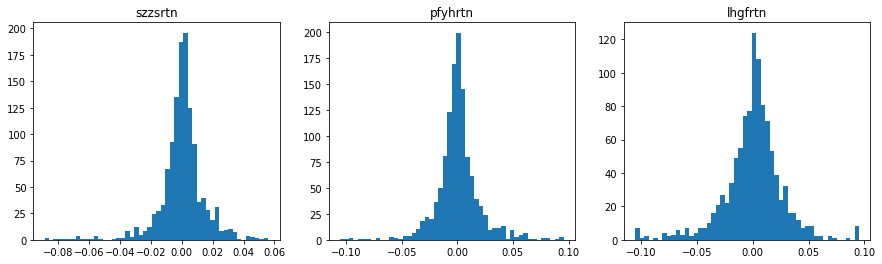

In [14]:
fig1, axss = plt.subplots(1,3 , figsize=(15,4))
axss[0].hist(szzsrtn, bins = 50)
axss[0].set_title("szzsrtn")
axss[1].hist(pfyhrtn, bins = 50)
axss[1].set_title("pfyhrtn")
axss[2].hist(lhgfrtn, bins = 50)
axss[2].set_title("lhgfrtn")
plt.show()

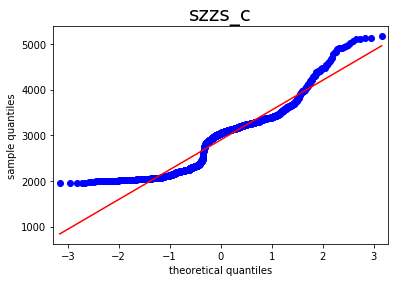

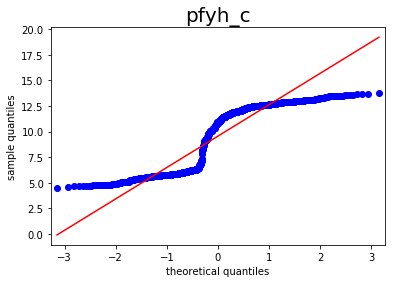

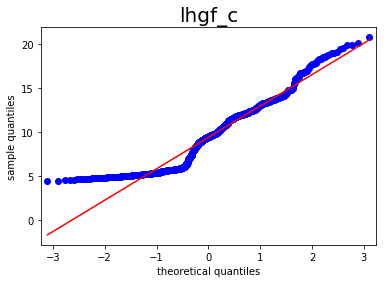

In [15]:
figqq1 = qqplot(szzs_c,line ="s")
plt.title("szzs_c",fontsize = 20)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
figqq2 = qqplot(pfyh_c,line ="s")
plt.title("pfyh_c",fontsize = 20)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
figqq3 = qqplot(lhgf_c,line ="s")
plt.title("lhgf_c",fontsize = 20)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
plt.show();

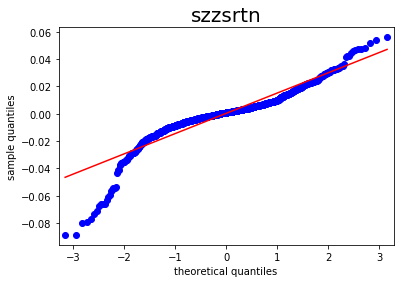

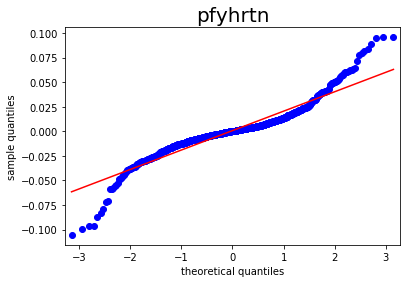

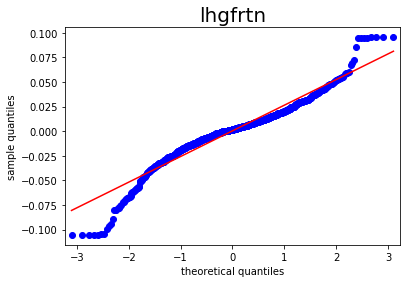

In [16]:
figqq11 = qqplot(szzsrtn,line ="s")
plt.title("szzsrtn",fontsize = 20)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
figqq22 = qqplot(pfyhrtn,line ="s")
plt.title("pfyhrtn",fontsize = 20)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
figqq33 = qqplot(lhgfrtn,line ="s")
plt.title("lhgfrtn",fontsize = 20)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
plt.show();

## 4.历史波动率计算与画图

In [17]:
#根据YYF代码修改，求历史波动率，Close-to-Close方法
def CtCHV(data, N):
    T = np.size(data)
    std_CtC = np.zeros(T-N)
    for i in range(0,T-N):
        std_CtC[i] = data[i:i+N].std()
    return std_CtC

#根据公式，求历史波动率，Close-to-Close方法
def CtC(data, N):
    T = np.size(data)
    std_CtC = np.zeros(T-N)
    for i in range(0,T-N):
        std_CtC[i] = np.sqrt((1/(N-1))*np.sum((data[i:i+N]-(1/N)*np.sum(data[i:i+N]))**2))
    return std_CtC

#根据公式，求历史波动率，Parkinson方法
def PHV(data,N):
    un = np.log(data.high/data.open)
    dn = np.log(data.low/data.open)
    T = np.size(data.close)
    std_P = np.zeros(T-N)
    for i in range(0,T-N):
        std_P[i] = np.sqrt((1/(4*N*np.log(2)))*np.sum((un[i:i+N]-dn[i:i+N])**2))
    return std_P
    
#根据公式，求历史波动率，Garman-Klass方法
def GKHV(data,N):
    un = np.log(data.high/data.open)
    dn = np.log(data.low/data.open)
    cn = np.log(data.close/data.open)
    T = np.size(data.close)
    std_GK = np.zeros(T-N)
    for i in range(0,T-N):
        pat1 = (0.511/N)*np.sum((un[i:i+N]-dn[i:i+N])**2)
        pat2 = (0.019/N)*np.sum(cn[i:i+N]*(un[i:i+N]+dn[i:i+N])-2*un[i:i+N]*dn[i:i+N])
        pat3 = (0.383/N)*np.sum(cn[i:i+N]**2)
        std_GK[i] = np.sqrt(pat1-pat2-pat3)
    return std_GK

#根据公式，求历史波动率，Rogers方法
def RHV(data,N):
    un = np.log(data.high/data.open)
    dn = np.log(data.low/data.open)
    cn = np.log(data.close/data.open)
    T = np.size(data.close)
    std_R = np.zeros(T-N)
    for i in range(0,T-N):
        std_R[i] = np.sqrt((1/N)*np.sum(un[i:i+N]*(un[i:i+N]-cn[i:i+N])+dn[i:i+N]*(dn[i:i+N]-cn[i:i+N])))
    return std_R

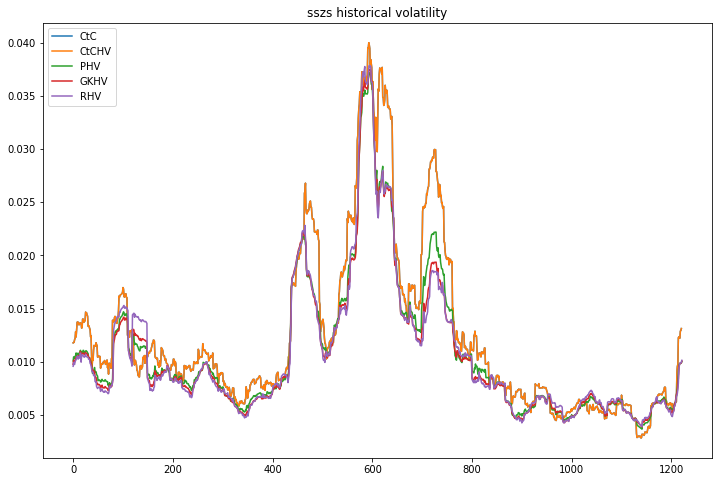

In [18]:
%matplotlib inline
plt.figure(figsize= (12,8))
plt.plot(CtC(szzsrtn,30),linestyle="-",label="CtC")
plt.plot(CtCHV(szzsrtn,30),linestyle="-",label="CtCHV")
plt.plot(PHV(szzs,30),linestyle="-",label="PHV")
plt.plot(GKHV(szzs,30),linestyle="-",label="GKHV")
plt.plot(RHV(szzs,30),linestyle="-",label="RHV")
plt.title('sszs historical volatility')
plt.legend(loc='upper left')

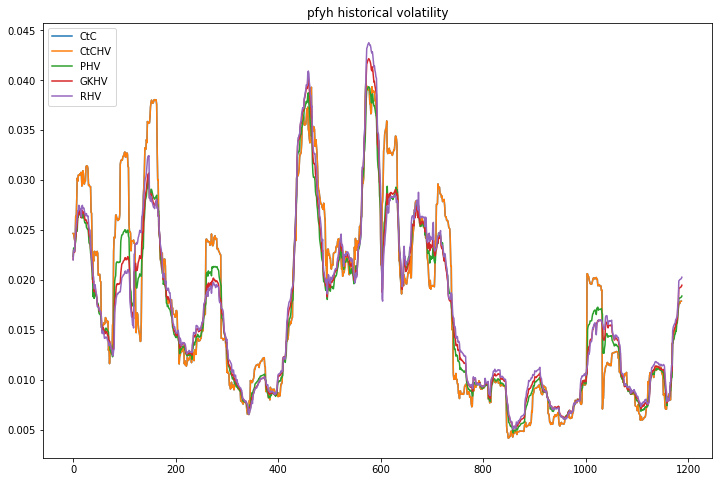

In [19]:
plt.figure(figsize= (12,8))
plt.plot(CtC(pfyhrtn,30),linestyle="-",label="CtC")
plt.plot(CtCHV(pfyhrtn,30),linestyle="-",label="CtCHV")
plt.plot(PHV(pfyh,30),linestyle="-",label="PHV")
plt.plot(GKHV(pfyh,30),linestyle="-",label="GKHV")
plt.plot(RHV(pfyh,30),linestyle="-",label="RHV")
plt.title('pfyh historical volatility')
plt.legend(loc='upper left')

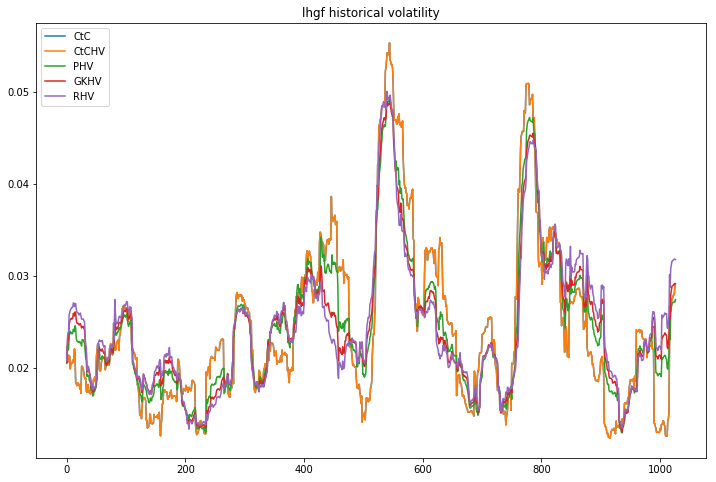

In [20]:
plt.figure(figsize= (12,8))
plt.plot(CtC(lhgfrtn,30),linestyle="-",label="CtC")
plt.plot(CtCHV(lhgfrtn,30),linestyle="-",label="CtCHV")
plt.plot(PHV(lhgf,30),linestyle="-",label="PHV")
plt.plot(GKHV(lhgf,30),linestyle="-",label="GKHV")
plt.plot(RHV(lhgf,30),linestyle="-",label="RHV")
plt.title('lhgf historical volatility')
plt.legend(loc='upper left')

## 5. 绘制动态VaR 和 ES图
### 以Garman-Klass方法为例

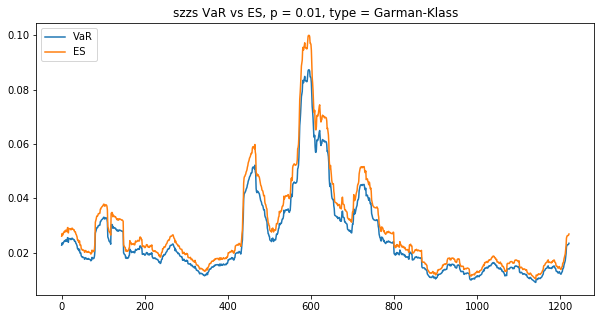

In [21]:
%matplotlib inline
from scipy.stats import norm
szzs_VaR = - GKHV(szzs,N=30)*norm.ppf(0.01)
szzs_ES = GKHV(szzs,N=30)*norm.pdf(norm.ppf(0.01))/0.01
plt.figure(figsize= (10,5))
plt.plot(szzs_VaR,linestyle="-", label ="VaR")
plt.plot(szzs_ES,linestyle="-", label ="ES")
plt.title("szzs VaR vs ES, p = 0.01, type = Garman-Klass")
plt.legend(loc = "upper left")

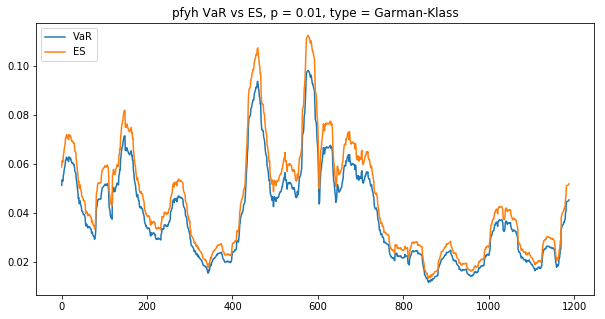

In [22]:
pfyh_VaR = - GKHV(pfyh,N=30)*norm.ppf(0.01)
pfyh_ES = GKHV(pfyh,N=30)*norm.pdf(norm.ppf(0.01))/0.01
plt.figure(figsize= (10,5))
plt.plot(pfyh_VaR,linestyle="-", label ="VaR")
plt.plot(pfyh_ES,linestyle="-", label ="ES")
plt.title("pfyh VaR vs ES, p = 0.01, type = Garman-Klass")
plt.legend(loc = "upper left")

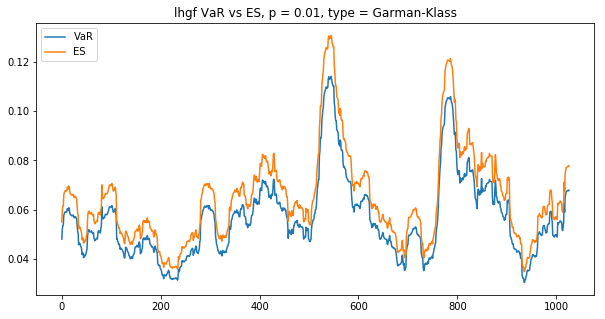

In [23]:
lhgf_VaR = - GKHV(lhgf,N=30)*norm.ppf(0.01)
lhgf_ES = GKHV(lhgf,N=30)*norm.pdf(norm.ppf(0.01))/0.01
plt.figure(figsize= (10,5))
plt.plot(lhgf_VaR,linestyle="-", label ="VaR")
plt.plot(lhgf_ES,linestyle="-", label ="ES")
plt.title("lhgf VaR vs ES, p = 0.01, type = Garman-Klass")
plt.legend(loc = "upper left")

## 6.1 使用极大似然估计方式求解garch model的参数


In [24]:
from scipy.optimize import minimize
fun = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},{'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
         {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})    
bnds = ((0, None), (0, None))
res = minimize(fun, (2, 0), method='SLSQP', bounds=bnds,
               constraints=cons)

C:\Users\cx\Anaconda3\lib\site-packages\scipy\optimize\slsqp.py:341: RuntimeWarning: invalid value encountered in greater
  bnderr = bnds[:, 0] > bnds[:, 1]


### 6.1.1 garch11 alpha & beta 的参数估计

In [110]:
from scipy.optimize import fmin_slsqp
from scipy.optimize import minimize
def garch_loglikelihood(parameters ,rets, output = False):
        alpha = parameters[0] 
        beta = parameters[1]
        omega = rets.var()*(1 - alpha - beta)
        Rt2 = rets**2
        T = len(rets)
        sigma2 = np.ones(T)*rets.var()
        for i in range(T-1):
            sigma2[i+1]  = omega + alpha*Rt2[i] + beta*sigma2[i]
        logliks = 0.5*(np.log(2*np.pi) + np.log(sigma2) + Rt2/sigma2)
        loglik = np.sum(logliks)
        if output == False:
            return loglik
        if output == True:
            return loglik,np.copy(sigma2)

In [38]:
startingVals = [0.1, 0.85]
def constraint(parameters, rets, out=None):
    alpha = parameters[0]
    beta = parameters[1]
    return np.array([1-alpha-beta])
bounds =[(0,1),(0,1)] 
args = (np.asarray(szzsrtn),)

estimates = fmin_slsqp(garch_loglikelihood, startingVals, f_ieqcons = constraint, bounds=bounds , args =args)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -3833.92800980994
            Iterations: 11
            Function evaluations: 50
            Gradient evaluations: 11


In [39]:
estimates

array([ 0.06250306,  0.93443775])

In [108]:
def Ngarch_loglikelihood(parameters, rets, output = False):
        alpha = parameters[0] 
        beta = parameters[1]
        theta = parameters[2]
        omega = parameters[3]
        Rt2 = rets**2
        T = len(rets)
        sigma2 = np.ones(T)*rets.var()
        for i in range(T-1):
            sigma2[i+1]  = omega + alpha*(rets[i] - theta*np.sqrt(sigma2[i]))**2 + beta*sigma2[i]
        logliks = 0.5*(np.log(2*np.pi) + np.log(sigma2) + Rt2/sigma2)
        loglik = np.sum(logliks)
        if output == False:
            return loglik
        if output == True:
            return loglik,np.copy(sigma2)

In [113]:
def Ngarch_constraint(parameters, rets,  output = False):
    alpha = parameters[0]
    beta = parameters[1]
    theta = parameters[2]
    omega = parameters[3]
    return np.array([1-alpha*(1 + theta**2)-beta])
startingVals = [0.07, 0.85,0.5,0.000005]
bounds =[(0,1),(0,1),(-10000,10000),(0,1)] 
args = (np.asarray(szzsrtn),)

estimates = fmin_slsqp(Ngarch_loglikelihood, startingVals, bounds=bounds , args =args, f_ieqcons= Ngarch_constraint)

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -3763.1491215791225
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1


In [114]:
estimates

array([  7.00000000e-02,   8.50000000e-01,   5.00000000e-01,
         5.00000000e-06])

In [79]:
def component_garch_loglikelihood(parameters ,rets, output = False):
        alpha_sigma = parameters[0] 
        beta_sigma = parameters[1]
        alpha_vega = parameters[2]
        beta_vega = parameters[3]
        sigma_square = parameters[4]
        T = len(rets)
        Rt2 = rets**2
        sigma2 = np.ones(T)*rets.var()
        vega = np.ones(T)*rets.var()
        for i in range(T-1):
            vega[i+1] = sigma_square + alpha_vega*(Rt2[i] - sigma2[i]) + beta_vega*(vega[i] - sigma_square)
            sigma2[i+1] = vega[i+1] + alpha_sigma*(Rt2[i] - vega[i]) + beta_sigma*(sigma2[i] - vega[i])
            
        logliks = 0.5*(np.log(2*np.pi) + np.log(sigma2) + Rt2/sigma2)
        loglik = np.sum(logliks)
        if output == False:
            return loglik
        if output == True:
            return loglik,sigma2

In [104]:
startingVals = [0.04, 0.92, 0.05, 0.9, szzsrtn.var()]
bounds =[(0,1),(0,1),(0,1),(0,1),(0,1)] 
args = (np.asarray(szzsrtn),)
estimates = fmin_slsqp(component_garch_loglikelihood, startingVals , args =args)

C:\Users\cx\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
C:\Users\cx\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
C:\Users\cx\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
C:\Users\cx\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app
C:\Users\cx\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


Optimization terminated successfully.    (Exit mode 0)
            Current function value: -3836.470518350913
            Iterations: 26
            Function evaluations: 227
            Gradient evaluations: 26


In [105]:
estimates

array([  5.13995838e-02,   9.47039123e-01,   3.16075522e-02,
         9.37867990e-01,   2.89873294e-04])

In [ ]:
Q8(rts1,name1,rts2,name2,rts3,name3)

running log diff returns
3715
running log diff returns
3715
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8108.924472609767
            Iterations: 14
            Function evaluations: 117
            Gradient evaluations: 14
Initial Values= [ 0.04518947  0.05907906  0.03        0.09        0.9       ]
Estimated Values= [-0.0072117   0.07473759  0.06925684  0.03495306  0.90581607]
ested loglik= 8108.92447261
Type     || mean|| std|| skew|| kurt||
Estimated GJR_Garch Vols     2.2994     0.9199     1.2928     1.4573
CtC HV     2.2927     0.8033     1.0040     0.2531
CtCRNA HV     2.2727     0.8033     1.0040     0.2531
RogersSatchell HV     2.1382     0.7039     0.9418    -0.2230
parkinson HV     2.1265     0.7177     0.9690    -0.1682
GermanKlass HV     2.1564     0.7175     0.9535    -0.2153
CDD Log Returns     0.0452     2.4306     0.2998     4.3685
NRets_GJR     0.0121     1.0005     0.4663     3.5398
NRets_CtC     0.0212     1.0748     0.

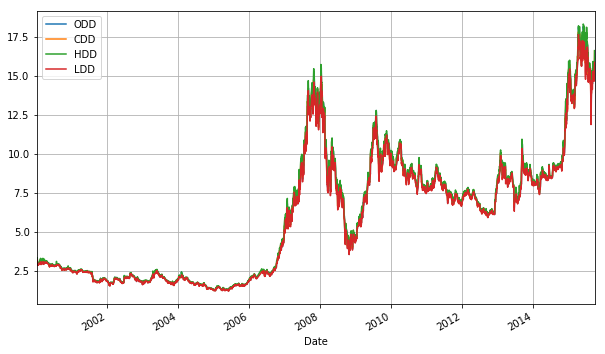

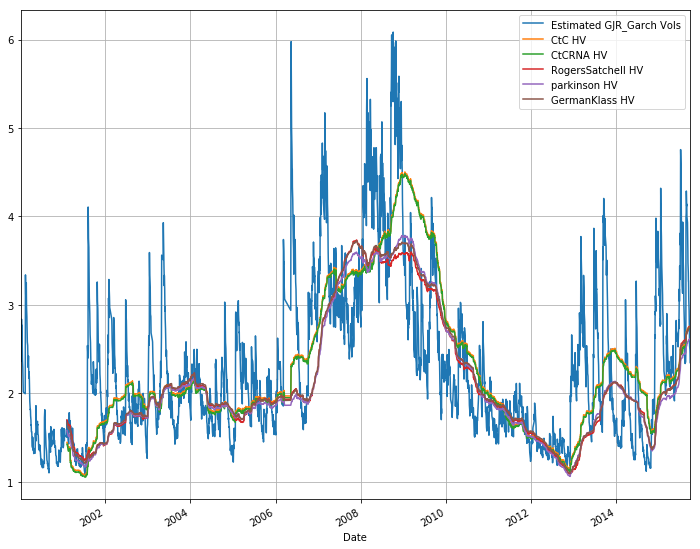

In [119]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep  6 09:18:34 2017

@author: yuyin
"""

import numpy as np
import pandas as pd
#import scipy.stats as ss
import matplotlib.pyplot as plt
from scipy.optimize import fmin_slsqp
#%matplotlib inline

def CtCHV(data, N, scal, out = None):
###---------------
# input: data : format either numpy or pandas
#        N : historial window
#        out: assume using log diff returns
# output std_CtC
###-----------
    if out is None:
        dfrets =scal*np.log(data.dropna()/data.dropna().shift(1)).dropna()
        print('running log diff returns')
    else:
        dfrets =scal*data.pct_change().dropna()
        print('running pct_change returns')
   
    T = np.size(dfrets,0)
    print(T)
    std_CtC=np.zeros((T-N,1))
    for t in range(0,T-N):
        std_CtC[t]=dfrets[t:t+N].std()
    
    return std_CtC

def CtCHVRNA(data, N, r, d, scal, out = None):
###---------------
# input: data : format either numpy or pandas
#        N : historial window
#        out: assume using log diff returns
# output std_CtCRNA
###-----------
    if out is None:
        dfrets =scal*np.log(data.dropna()/data.dropna().shift(1)).dropna()
        print('running log diff returns')
    else:
        dfrets =scal*data.pct_change().dropna()
        print('running pct_change returns')
   
    T = np.size(dfrets,0)
    print(T)
    std_CtCRNA=np.zeros((T-N,1))
    for t in range(0,T-N):
        std_CtCRNA[t]=dfrets[t:t+N].std()-r+d
    
    return std_CtCRNA

def GermanKlassHV(HDD, LDD, ODD, CDD, N, scal):
    un = scal*np.log(HDD/ODD)
    dn = scal*np.log(LDD/ODD)
    cn = scal*np.log(CDD/ODD)
    C1=0.511
    C2=0.019
    C3=0.385
    
    T = np.size(HDD,0)
    std_gk=np.zeros((T-N,1))
    for i in range(0,T-N):
        prt1 = (C1/N)*(np.sum((un[i:i+N]-dn[i:i+N])**2))
        pprt1 = cn[i:i+N]*(un[i:i+N]+dn[i:i+N])
        pprt2 = 2*un[i:i+N]*dn[i:i+N]
        prt2 = -(C2/N)*np.sum(pprt1+pprt2)
        prt3 = -(C3/N)*np.sum(cn[i:i+N]**2)
        std_gk[i]=np.sqrt(prt1+prt2+prt3)
        
    return std_gk

def parkinsonHV(HDD, LDD, ODD, N, scal):
    un = scal*np.log(HDD/ODD)
    dn = scal*np.log(LDD/ODD)

    T = np.size(HDD,0)
    std_park=np.zeros((T-N,1))
    for i in range(0,T-N):
        std_park[i]=np.sqrt((1/(4*N*np.log(2)))*np.sum((un[i:i+N]-dn[i:i+N])**2))
        
    return std_park

def RogersSatchellHV(HDD, LDD, ODD, CDD, N, scal):
    un = scal*np.log(HDD/ODD)
    dn = scal*np.log(LDD/ODD)
    cn = scal*np.log(CDD/ODD)
    
    T = np.size(HDD,0)
    std_rs=np.zeros((T-N,1))
    for i in range(0,T-N):
        tmp=un[i:i+N]*(un[i:i+N]-cn[i:i+N])+dn[i:i+N]*(dn[i:i+N]-cn[i:i+N]);
        std_rs[i]=np.sqrt(np.mean(tmp));
        
    return std_rs

def gjr_garch_likelihood(parameters, data, sigma2, out = None):
    mu = parameters[0]
    omega = parameters[1]
    alpha = parameters[2]
    gamma = parameters[3]
    beta = parameters[4]
    
    T = np.size(data,0)
    eps = data - mu
    for t in range(1,T):
        sigma2[t]=(omega+alpha*eps[t-1]**2+gamma*eps[t-1]**2 * (eps[t-1]<0)+beta*sigma2[t-1])
        
    logliks = 0.5*(np.log(2*np.pi)+np.log(sigma2)+eps**2/sigma2)
    loglik = np.sum(logliks)
    
    if out is None:
        return loglik
    else:
        return loglik, logliks, np.copy(sigma2)

def gjr_constraint(parameters, data, sigma2, out=None):
    alpha = parameters[2]
    gamma = parameters[3]
    beta = parameters[4]
    return np.array([1-alpha-gamma/2-beta])


df = pd.read_excel("SH600000.xlsx",parse_dates=[0])
df[:5]
df.index=df.pop('Date') 

df.plot(grid=True,figsize=(10,6))
df.head()

N=252
scal=100
r=0.03 #risk-free rate
d=0.01 #dividen rate

HDD=np.array(df.HDD)
LDD=np.array(df.LDD)
ODD=np.array(df.ODD)
CDD=np.array(df.CDD)


std_CtC = CtCHV(df.CDD,N,scal)
std_CtCRNA =  CtCHVRNA(df.CDD, N, r, d, scal)
std_park = parkinsonHV(HDD, LDD, ODD, N, scal)
std_gk = GermanKlassHV(HDD, LDD, ODD, CDD, N, scal)
std_rs = RogersSatchellHV(HDD, LDD, ODD, CDD, N, scal)

df.CDD
dfrets = scal*np.log(df.CDD.dropna()/df.CDD.dropna().shift(1)).dropna() 
dfrets

mean_rts = dfrets.mean()
var_rts =dfrets.var();

#demo volatilities with given parameters
startingVals = np.array([mean_rts,
                       var_rts*.01,
                       .03,.09,.90])
T=len(dfrets)
finfo=np.finfo(np.float64)
bounds  =[(-10*mean_rts,10*mean_rts),
         (finfo.eps,2*var_rts),
         (0.0,1.0),(0.0,1.0),(0.0,1.0)]

sigma2 = np.ones(T)*(var_rts)

args = (np.asarray(dfrets),sigma2)

estimates = fmin_slsqp(gjr_garch_likelihood, startingVals, f_ieqcons=gjr_constraint, bounds=bounds, args =args)

print('Initial Values=',startingVals)
print('Estimated Values=',estimates)

analized=1 # or we should set to 252
sigma2 = np.ones(T)*(var_rts)
loglik, _, sigma2final = gjr_garch_likelihood(estimates,np.array(dfrets), sigma2, out=True)

gjr_vol=np.sqrt(analized*sigma2final)

ested_vol = pd.DataFrame(gjr_vol,index=dfrets.index,columns=['Estimated GJR_Garch Vols'])

CtC_HV = pd.DataFrame(std_CtC,index=dfrets.index[N:],columns=['CtC HV'])
CtCRNA_HV = pd.DataFrame(std_CtCRNA,index=dfrets.index[N:],columns=['CtCRNA HV'])
rs_HV = pd.DataFrame(std_rs,index=dfrets.index[N-1:],columns=['RogersSatchell HV'])
park_HV = pd.DataFrame(std_park,index=dfrets.index[N-1:],columns=['parkinson HV'])
gk_HV = pd.DataFrame(std_gk,index=dfrets.index[N-1:],columns=['GermanKlass HV'])

df_Vols=pd.concat([ested_vol,CtC_HV,CtCRNA_HV,rs_HV,park_HV,gk_HV],axis=1)
df_Vols.plot(figsize=(12,10),grid=True)

df_Vols.loc[:,'CDD Log Returns']=dfrets
df_Vols[N-2:N-7]

tmpx1= df_Vols['CDD Log Returns']/df_Vols['Estimated GJR_Garch Vols']
tmpx2= df_Vols['CDD Log Returns']/df_Vols['CtC HV']
tmpx3= df_Vols['CDD Log Returns']/df_Vols['CtCRNA HV']
tmpx4= df_Vols['CDD Log Returns']/df_Vols['RogersSatchell HV']
tmpx5= df_Vols['CDD Log Returns']/df_Vols['parkinson HV']
tmpx6= df_Vols['CDD Log Returns']/df_Vols['GermanKlass HV']
#df_Vols['Estimated GJR_Garch Vols']

df_Vols.loc[:,'NRets_GJR']=tmpx1
df_Vols.loc[:,'NRets_CtC']=tmpx2
df_Vols.loc[:,'NRets_GtCRNA']=tmpx3
df_Vols.loc[:,'NRets_RogersSatchell']=tmpx4
df_Vols.loc[:,'NRets_parkinson']=tmpx5
df_Vols.loc[:,'NRets_GermanKlass']=tmpx6

print('ested loglik=',loglik)

llist= df_Vols.columns.tolist()

print('Type     ||','mean||','std||','skew||','kurt||')
for ii in range(len(llist)):
    #print (ii,llist[ii])
    #aa=df_Vols[llist[ii]].describe()
    #aa['skew']=df_Vols[llist[ii]].skew()
    #aa['kurtosis']=df_Vols[llist[ii]].skew()
    a1=df_Vols[llist[ii]].mean()
    a2=df_Vols[llist[ii]].std()
    a3=df_Vols[llist[ii]].skew()
    a4=df_Vols[llist[ii]].kurtosis()
    print(llist[ii],'%10.4f'%(a1),'%10.4f'%(a2),'%10.4f'%(a3),'%10.4f'%(a4))


df_Vols.to_csv("SH60000_HV_gjr_vols.csv",index_label='date')
df_Vols.to_excel("SH60000_HV_gjr_vols.xls",index_label='date')

plt.show()

In [120]:
sigma2final

array([ 5.90790607,  5.56008385,  5.64525615, ...,  6.19645122,
        5.99354705,  5.51091577])